In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("/Users/suryamanitejendla/Downloads/DAEN-690-main/identical123.csv")

In [3]:
df.head(5)

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,STEMOCC.1,SUPERVIS.1,TOA.1,WORKSCH.1,WORKSTAT.1,DATECODE1,EMPLOYMENT1,SALARY.1,LOS.1,Salary_hike
0,AF1Q,40,J,4,12,F,1670,2,99,GS-12,...,XXXX,8,10,F,1,202109,1,98155,17.6,NO
1,AF1Q,40,I,13,13,I,1361,2,99,GS-13,...,1361,8,10,F,1,202109,1,119787,32.3,NO
2,AF1Q,40,I,10,13,G,2150,2,99,GS-13,...,XXXX,2,10,F,1,202109,1,119787,20.7,NO
3,AF1Q,40,J,14,13,H,1372,1,99,GS-13,...,1372,8,10,F,1,202109,1,119787,26.3,NO
4,AF1Q,40,G,10,12,E,343,2,99,GS-12,...,XXXX,8,10,F,1,202109,1,82655,14.8,NO


In [4]:
df.corr()

,EDLVL,GSEGRD,OCC,PATCO,PP,SUPERVIS,TOA,WORKSTAT,DATECODE,EMPLOYMENT,...,OCC.1,PATCO.1,PP1,SUPERVIS.1,TOA.1,WORKSTAT.1,DATECODE1,EMPLOYMENT1,SALARY.1,LOS.1
EDLVL,1.000000,0.216129,-0.104548,-0.292583,NaN,-0.130038,0.231753,-0.012737,NaN,NaN,...,-0.110016,-0.292583,NaN,-0.130038,0.231753,-0.012737,NaN,NaN,0.159318,-0.172708
GSEGRD,0.216129,1.000000,0.136599,-0.508998,NaN,-0.457438,-0.022873,-0.226697,NaN,NaN,...,0.134586,-0.508998,NaN,-0.457438,-0.022873,-0.226697,NaN,NaN,0.867076,0.212991
OCC,-0.104548,0.136599,1.000000,-0.132350,NaN,0.043985,-0.047987,-0.069900,NaN,NaN,...,0.974478,-0.132350,NaN,0.043985,-0.047987,-0.069900,NaN,NaN,0.078709,0.054067
PATCO,-0.292583,-0.508998,-0.132350,1.000000,NaN,0.123015,-0.341491,0.159431,NaN,NaN,...,-0.129800,1.000000,NaN,0.123015,-0.341491,0.159431,NaN,NaN,-0.406511,-0.011569
PP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUPERVIS,-0.130038,-0.457438,0.043985,0.123015,NaN,1.000000,-0.039009,0.052634,NaN,NaN,...,0.040398,0.123015,NaN,1.000000,-0.039009,0.052634,NaN,NaN,-0.551646,-0.130991
TOA,0.231753,-0.022873,-0.047987,-0.341491,NaN,-0.039009,1.000000,0.474239,NaN,NaN,...,-0.047112,-0.341491,NaN,-0.039009,1.000000,0.474239,NaN,NaN,0.026769,-0.203159
WORKSTAT,-0.012737,-0.226697,-0.069900,0.159431,NaN,0.052634,0.474239,1.000000,NaN,NaN,...,-0.068761,0.159431,NaN,0.052634,0.474239,1.000000,NaN,NaN,-0.182058,-0.175074
DATECODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMPLOYMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
del df['DATECODE']
del df['DATECODE1']
del df['EMPLOYMENT']
del df['EMPLOYMENT1']
del df['PP']
del df['PP1']

In [6]:
df

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PPGRD,SALLVL,...,PPGRD.1,SALLVL.1,STEMOCC.1,SUPERVIS.1,TOA.1,WORKSCH.1,WORKSTAT.1,SALARY.1,LOS.1,Salary_hike
0,AF1Q,40,J,4,12,F,1670,2,GS-12,I,...,GS-12,I,XXXX,8,10,F,1,98155,17.6,NO
1,AF1Q,40,I,13,13,I,1361,2,GS-13,K,...,GS-13,K,1361,8,10,F,1,119787,32.3,NO
2,AF1Q,40,I,10,13,G,2150,2,GS-13,K,...,GS-13,K,XXXX,2,10,F,1,119787,20.7,NO
3,AF1Q,40,J,14,13,H,1372,1,GS-13,K,...,GS-13,K,1372,8,10,F,1,119787,26.3,NO
4,AF1Q,40,G,10,12,E,343,2,GS-12,H,...,GS-12,H,XXXX,8,10,F,1,82655,14.8,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,VAKB,11,I,15,15,I,301,2,GS-15,Q,...,GS-15,Q,XXXX,8,10,F,1,172500,30.3,NO
1276,VAKB,11,F,13,15,G,343,2,GS-15,N,...,GS-15,N,XXXX,8,15,F,1,148932,21.2,NO
1277,VAKB,11,H,13,14,D,301,2,GS-14,L,...,GS-14,M,XXXX,8,10,F,1,130698,9.3,YES
1278,VAKB,11,E,17,12,E,301,2,GS-12,H,...,GS-13,J,XXXX,8,10,F,1,103690,11.8,YES


In [7]:
df.shape

(1280, 35)

In [8]:
df.describe()

,EDLVL,GSEGRD,OCC,PATCO,SUPERVIS,TOA,WORKSTAT,SALARY,LOS,EDLVL.1,GSEGRD.1,OCC.1,PATCO.1,SUPERVIS.1,TOA.1,WORKSTAT.1,SALARY.1,LOS.1
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,11.994531,12.519531,779.680469,1.944531,7.035938,12.720313,1.022656,110173.682813,15.392656,11.994531,12.589063,776.703125,1.944531,7.035938,12.720313,1.022656,111371.032031,15.692656
std,5.295414,1.785510,417.528118,0.448315,2.191095,6.413670,0.148863,28749.405519,11.354620,5.295414,1.699433,417.849165,0.448315,2.191095,6.413670,0.148863,28328.210331,11.354620
min,1.000000,4.000000,18.000000,1.000000,2.000000,10.000000,1.000000,31520.000000,0.000000,1.000000,4.000000,18.000000,1.000000,2.000000,10.000000,1.000000,31520.000000,0.300000
25%,7.000000,12.000000,343.000000,2.000000,8.000000,10.000000,1.000000,92523.000000,5.800000,7.000000,12.000000,343.000000,2.000000,8.000000,10.000000,1.000000,93688.500000,6.100000
50%,13.000000,13.000000,905.000000,2.000000,8.000000,10.000000,1.000000,110985.000000,13.650000,13.000000,13.000000,905.000000,2.000000,8.000000,10.000000,1.000000,112172.000000,13.950000
75%,17.000000,13.000000,1101.000000,2.000000,8.000000,10.000000,1.000000,127353.250000,22.900000,17.000000,13.000000,1101.000000,2.000000,8.000000,10.000000,1.000000,127844.500000,23.200000
max,21.000000,15.000000,2210.000000,5.000000,8.000000,44.000000,2.000000,172500.000000,60.000000,21.000000,15.000000,2210.000000,5.000000,8.000000,44.000000,2.000000,172500.000000,60.300000


In [9]:
df= pd.get_dummies(df)
df

,EDLVL,GSEGRD,OCC,PATCO,SUPERVIS,TOA,WORKSTAT,SALARY,LOS,EDLVL.1,...,STEMOCC.1_828,STEMOCC.1_830,STEMOCC.1_854,STEMOCC.1_855,STEMOCC.1_861,STEMOCC.1_XXXX,WORKSCH.1_F,WORKSCH.1_P,Salary_hike_NO,Salary_hike_YES
0,4,12,1670,2,8,10,1,98155,17.3,4,...,0,0,0,0,0,1,1,0,1,0
1,13,13,1361,2,8,10,1,119787,32.0,13,...,0,0,0,0,0,0,1,0,1,0
2,10,13,2150,2,2,10,1,119787,20.4,10,...,0,0,0,0,0,1,1,0,1,0
3,14,13,1372,1,8,10,1,119787,26.0,14,...,0,0,0,0,0,0,1,0,1,0
4,10,12,343,2,8,10,1,82655,14.5,10,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,15,15,301,2,8,10,1,172500,30.0,15,...,0,0,0,0,0,1,1,0,1,0
1276,13,15,343,2,8,15,1,148932,20.9,13,...,0,0,0,0,0,1,1,0,1,0
1277,13,14,301,2,8,10,1,126614,9.0,13,...,0,0,0,0,0,1,1,0,0,1
1278,17,12,301,2,8,10,1,87198,11.5,17,...,0,0,0,0,0,1,1,0,0,1


In [ ]:
#del df['AGYSUB']

In [ ]:
#del df['SALLVL']

In [27]:
X = df.loc[:, df.columns != 'Salary_hike_YES']

In [28]:
y = df.loc[:, df.columns == 'Salary_hike_YES']

In [29]:
y = np.ravel(y)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [32]:
len(X_train)

960

In [33]:
len(X_test)

320

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_reg = LogisticRegression()

In [36]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[252   0]
 [  0  68]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00        68

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



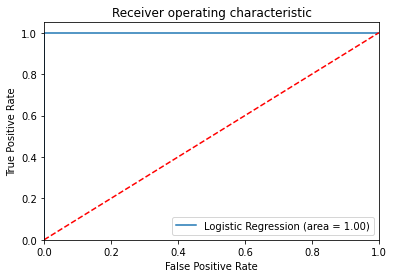

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
X = df.loc[:, df.columns != 'Salary_hike_YES']

In [45]:
y = df.loc[:, df.columns == 'Salary_hike_YES']

In [50]:
y = np.ravel(y)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [65]:
model = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [66]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=500)

In [67]:
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]


In [68]:
from sklearn import metrics

In [69]:
rf_probs = model.predict_proba(X_test)[:, 1]

In [70]:
rf_probs

array([0.122, 0.026, 0.052, 0.056, 0.104, 0.142, 0.066, 0.722, 0.122,
       0.118, 0.776, 0.116, 0.04 , 0.046, 0.03 , 0.76 , 0.636, 0.038,
       0.048, 0.154, 0.092, 0.13 , 0.072, 0.064, 0.134, 0.082, 0.074,
       0.702, 0.112, 0.092, 0.758, 0.108, 0.024, 0.6  , 0.046, 0.072,
       0.086, 0.032, 0.104, 0.026, 0.132, 0.052, 0.168, 0.036, 0.156,
       0.054, 0.756, 0.014, 0.016, 0.096, 0.056, 0.6  , 0.122, 0.024,
       0.176, 0.168, 0.048, 0.052, 0.722, 0.032, 0.698, 0.008, 0.042,
       0.064, 0.038, 0.032, 0.048, 0.03 , 0.666, 0.066, 0.194, 0.122,
       0.048, 0.108, 0.086, 0.138, 0.034, 0.06 , 0.04 , 0.03 , 0.024,
       0.062, 0.076, 0.118, 0.07 , 0.098, 0.202, 0.092, 0.084, 0.814,
       0.006, 0.08 , 0.746, 0.012, 0.122, 0.726, 0.7  , 0.076, 0.738,
       0.032, 0.02 , 0.034, 0.076, 0.178, 0.028, 0.892, 0.02 , 0.092,
       0.184, 0.06 , 0.664, 0.044, 0.154, 0.056, 0.736, 0.08 , 0.018,
       0.018, 0.12 , 0.448, 0.688, 0.738, 0.052, 0.014, 0.81 , 0.02 ,
       0.198, 0.61 ,

In [71]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

In [72]:
roc_value

1.0

In [73]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 1.00


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[254   0]
 [  0  66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00        66

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

1.0
